In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/mov-2019/DATATALENT_TRAFICOVOZSMS.txt
/kaggle/input/mov-2019/DATATALENT_TRAFICO_DATOS.txt
/kaggle/input/mov-2019/DATATALENT_FACTURACION.txt
/kaggle/input/mov-2019/DATATALENT_PLANTA.txt
/kaggle/input/mov-2019/DATATALENT_INDICADORES_RED.txt
/kaggle/input/mov-2019/DATATALENT_INTENTOS_PORTA.txt
/kaggle/input/mov-2019/DATATALENT_CONSULTAS_PORTA.txt
/kaggle/input/mov-2019/DATATALENT_TARGET.txt
/kaggle/input/mov-2019/DATATALENT_EQUIPOS.txt
/kaggle/input/juanacostupa/no_se_xd_CV_0.8599.csv
/kaggle/input/submission/Target_ejemplo_subir_kaggle.csv


In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt, seaborn as sns

In [3]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [4]:
TRAFICOVOZSMS=pd.read_csv('/kaggle/input/mov-2019/DATATALENT_TRAFICOVOZSMS.txt',sep='|')
TRAFICO_DATOS=pd.read_csv('/kaggle/input/mov-2019/DATATALENT_TRAFICO_DATOS.txt',sep='|')
FACTURACION=pd.read_csv('/kaggle/input/mov-2019/DATATALENT_FACTURACION.txt',sep='|',parse_dates=['FECHA_VENCIMIENTO','FECHA_PAGO'])
PLANTA=pd.read_csv('/kaggle/input/mov-2019/DATATALENT_PLANTA.txt',sep='|',parse_dates=['FECHAINICIO', 'FECHA_ALTA_POSTPAGO'])
INDICADORES_RED=pd.read_csv('/kaggle/input/mov-2019/DATATALENT_INDICADORES_RED.txt',sep='|')
INTENTOS_PORTA=pd.read_csv('/kaggle/input/mov-2019/DATATALENT_INTENTOS_PORTA.txt',sep='|')
CONSULTAS_PORTA=pd.read_csv('/kaggle/input/mov-2019/DATATALENT_CONSULTAS_PORTA.txt',sep='|')
TARGET=pd.read_csv('/kaggle/input/mov-2019/DATATALENT_TARGET.txt',sep='|')
EQUIPOS=pd.read_csv('/kaggle/input/mov-2019/DATATALENT_EQUIPOS.txt',sep='|')

In [5]:
TARGET.head()

,PERIODO,ID2,ID1,TARGET_PERM
0,201903,XX0lIkr+IXJpHhI73pP9OPcK8COdA+gFug29rszqMrA=,81omV0CgJ3eAycaD9oQ5Jnujz1+F3T0eXqJEZWNLE6Q=,0.0
1,201904,KtORvC1owqwWd0yGGWmRYC4S2ZhTRsLb04VINE/T3mE=,WQjPGbMIMi+cDDsVU3hWhtBq6rU5APmMp17WJBh3C2E=,NaN
2,201902,PmRKH5Djr410kBHbAjtGsv8Poc6F7jQqCiW8z7bBgjc=,l6KaXmkyGfIgADZIfGjKftYV64GVqmE/Yg5EwxsZfRA=,0.0
3,201902,WnoD/m2IIp0Sn+oiYm70ccUXvFXXuiooLnv+7dFTAw0=,Kj5cvEh+GtwTXrHz/3NAE99Ad+4ZvU2HKlxEV5BCFCk=,0.0
4,201904,5OCi6B7EADY5F03JbHa8vKo4dMYyUDjpz1v+Gi2n+Gg=,L5hkyjzrD38WN0xGufxTmtFomRquhauOqADbSNAfFGo=,NaN


In [6]:
TARGET.shape

(117686, 4)

In [7]:
len(TARGET.ID2.unique())

116242

In [8]:
len(TARGET.ID1.unique())

117686

In [9]:
TARGET_test=TARGET[(TARGET['TARGET_PERM'].isna())]

TARGET_train=TARGET[~(TARGET['TARGET_PERM'].isna())]



In [10]:
TARGET_train.head()

,PERIODO,ID2,ID1,TARGET_PERM
0,201903,XX0lIkr+IXJpHhI73pP9OPcK8COdA+gFug29rszqMrA=,81omV0CgJ3eAycaD9oQ5Jnujz1+F3T0eXqJEZWNLE6Q=,0.0
2,201902,PmRKH5Djr410kBHbAjtGsv8Poc6F7jQqCiW8z7bBgjc=,l6KaXmkyGfIgADZIfGjKftYV64GVqmE/Yg5EwxsZfRA=,0.0
3,201902,WnoD/m2IIp0Sn+oiYm70ccUXvFXXuiooLnv+7dFTAw0=,Kj5cvEh+GtwTXrHz/3NAE99Ad+4ZvU2HKlxEV5BCFCk=,0.0
5,201903,CEbUCGNVAK0QQpkpBmrT+WHCTKvXq1VswEU0BWozzgM=,zSD8dAEzq+UzTFjWwTgGKGQ58FB5SoaupK3mz5Ypweo=,0.0
9,201903,qj6fTU3MVxce3dw5w2pJHuuuEGYDXw3MBN9ew/AwzdA=,/CscDAWSvtOThMA2S++qVLf1yv26o6XD5JbOW8xsxJQ=,0.0


In [11]:
TARGET_test.head()

,PERIODO,ID2,ID1,TARGET_PERM
1,201904,KtORvC1owqwWd0yGGWmRYC4S2ZhTRsLb04VINE/T3mE=,WQjPGbMIMi+cDDsVU3hWhtBq6rU5APmMp17WJBh3C2E=,NaN
4,201904,5OCi6B7EADY5F03JbHa8vKo4dMYyUDjpz1v+Gi2n+Gg=,L5hkyjzrD38WN0xGufxTmtFomRquhauOqADbSNAfFGo=,NaN
6,201904,0960Sdb+i05ZJhaiVtIjE/qu17Lc+PnTt1CAQIZKAwQ=,WvKgP0/9qE4pAXpx3xS2TFohqqdIDrLExmfKJSUVV4w=,NaN
7,201904,Psab8iMl5AUJRfE5ynpbCfmdqU2eBmWQGTv6l7HYaA0=,nfyM7o4WvCSqe9qLqS+/RrBvGPNiej2cXdIdCbnsB7w=,NaN
8,201905,R8rPYiP1mfzVFNLk2hHdq/hPws8JkiSr9jd55GNImkY=,hJpvDxF5OBFA45eVC5cad9g0pjrbuWk1jCa5No4uxIw=,NaN


In [12]:
print(TARGET_train.shape,TARGET_test.shape)

(48401, 4) (69285, 4)


# TRAFICOVOZSMS

In [13]:
TRAFICOVOZSMS.head()

,PERIODO,ID1,AIRTIME_IN_TOT,AIRTIME_IN_ON,AIRTIME_IN_OFF,AIRTIME_IN_WEEK,AIRTIME_IN_WEEKD,CALLS_IN_TOT,CALLS_IN_ON,CALLS_IN_OFF,...,DEST_VOICE_OFF,DAYS_OUT_VOICE_TOT,DAYS_OUT_VOICE_ON,DAYS_OUT_VOICE_OFF,CONT_TOT,CONT_ON,CONT_OFF,TOP_CONT_5,TOP_CONT_ON_5,TOP_CONT_OFF_5
0,201903,d9sAFKvHX7JLASr7idoYgtLBzA3ZwSkPlR1OMyuotn4=,416.17,351.42,64.75,294.08,122.08,189,131,58,...,30,31,31,29,67,27,40,17,9,8
1,201903,DtuYOUrtY9SIkEqHHTEip7TFViOEYPppLJB7MA9p5QE=,199.12,79.33,116.38,172.95,26.17,139,55,83,...,25,30,27,29,68,34,31,22,8,13
2,201902,Z51/X9DPQRiBYPgNQD+ZQ9pO1NslLoOaF7x/NpcJqZg=,649.82,384.00,263.72,576.33,73.48,221,102,116,...,26,25,22,20,66,16,44,20,7,12
3,201902,Kj5cvEh+GtwTXrHz/3NAE99Ad+4ZvU2HKlxEV5BCFCk=,57.45,7.72,49.73,43.30,14.15,52,8,44,...,11,25,9,20,24,10,13,4,2,2
4,201904,2RpPr9+t9rAAL/fOOH5XXKN0iCcW1NFOHKqtiS/30Wk=,101.92,1.47,7.52,52.83,49.08,48,1,4,...,13,26,5,16,27,2,13,6,1,4


In [14]:
TRAFICOVOZSMS.shape

(343138, 40)

In [15]:
len(TRAFICOVOZSMS.ID1.unique())

116289

In [16]:
len(list(set(TARGET.ID1.unique()).difference(TRAFICOVOZSMS.ID1.unique()))) #sirve agg

1397

In [17]:
missing_values_table(TRAFICOVOZSMS)

Your selected dataframe has 40 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [18]:
TRAFICOVOZSMS['ID1_count']=TRAFICOVOZSMS.groupby('ID1')['ID1'].transform('count')

In [19]:
TRAFICOVOZSMS.head()

,PERIODO,ID1,AIRTIME_IN_TOT,AIRTIME_IN_ON,AIRTIME_IN_OFF,AIRTIME_IN_WEEK,AIRTIME_IN_WEEKD,CALLS_IN_TOT,CALLS_IN_ON,CALLS_IN_OFF,...,DAYS_OUT_VOICE_TOT,DAYS_OUT_VOICE_ON,DAYS_OUT_VOICE_OFF,CONT_TOT,CONT_ON,CONT_OFF,TOP_CONT_5,TOP_CONT_ON_5,TOP_CONT_OFF_5,ID1_count
0,201903,d9sAFKvHX7JLASr7idoYgtLBzA3ZwSkPlR1OMyuotn4=,416.17,351.42,64.75,294.08,122.08,189,131,58,...,31,31,29,67,27,40,17,9,8,3
1,201903,DtuYOUrtY9SIkEqHHTEip7TFViOEYPppLJB7MA9p5QE=,199.12,79.33,116.38,172.95,26.17,139,55,83,...,30,27,29,68,34,31,22,8,13,3
2,201902,Z51/X9DPQRiBYPgNQD+ZQ9pO1NslLoOaF7x/NpcJqZg=,649.82,384.00,263.72,576.33,73.48,221,102,116,...,25,22,20,66,16,44,20,7,12,3
3,201902,Kj5cvEh+GtwTXrHz/3NAE99Ad+4ZvU2HKlxEV5BCFCk=,57.45,7.72,49.73,43.30,14.15,52,8,44,...,25,9,20,24,10,13,4,2,2,3
4,201904,2RpPr9+t9rAAL/fOOH5XXKN0iCcW1NFOHKqtiS/30Wk=,101.92,1.47,7.52,52.83,49.08,48,1,4,...,26,5,16,27,2,13,6,1,4,3


In [20]:
num_col=TRAFICOVOZSMS.columns.to_list()
num_col.remove('ID1')

In [21]:
aggs = {}
for col in num_col:
    aggs[col] =['mean','sum','var','max','min','median']

In [22]:
aggs

{'PERIODO': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'AIRTIME_IN_TOT': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'AIRTIME_IN_ON': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'AIRTIME_IN_OFF': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'AIRTIME_IN_WEEK': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'AIRTIME_IN_WEEKD': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'CALLS_IN_TOT': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'CALLS_IN_ON': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'CALLS_IN_OFF': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'CALLS_IN_WEEK': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'CALLS_IN_WEEKD': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'ORIG_VOICE_TOT': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'ORIG_VOICE_ON': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'ORIG_VOICE_OFF': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'DAYS_IN_VOICE_TOT': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'DAYS

In [23]:
TRAFICOVOZSMS_agg=TRAFICOVOZSMS.groupby('ID1').agg(aggs).reset_index()

In [24]:
TRAFICOVOZSMS_agg.head()

ID1        PERIODO          \
                                                          mean     sum   
0  ++1YIft7l8n6UxxfRM7D5NxRTZpr3bvS8Du0LYrvE4s=  201904.000000  605712   
1  ++2BOagEvlyiUtyrnEOdbU2gk06xszwj73/JrOHgFh0=  201904.000000  201904   
2  ++5y2lI/pwiJBfJ2TYs5VkMxqHOPJQPROYq9zv4Bf/U=  201871.666667  605615   
3  ++EEjuzDYpwkyRn/9pRiRT3puUrojwRzkOFvLbHsxM4=  201902.000000  605706   
4  ++F0JzgV5wAwOSJXaIlGNVltsQedCTdk67iF04VKWJU=  201903.000000  605709   

                                         AIRTIME_IN_TOT           \
           var     max     min    median           mean      sum   
0     1.000000  201905  201903  201904.0     320.763333   962.29   
1          NaN  201904  201904  201904.0     653.080000   653.08   
2  2670.333333  201902  201812  201901.0      77.666667   233.00   
3     1.000000  201903  201901  201902.0     245.800000   737.40   
4     1.000000  201904  201902  201903.0     562.493333  1687.48   

                 ... TOP_CONT_OFF_5                ID1_count                   \
            var  ...            var max min median      mean sum  var max min   
0  21211.616633  ...       0.333333  10   9    9.0         3   9  0.0   3   3   
1           NaN  ...            NaN  27  27   27.0         1   1  NaN   1   1   
2    134.493733  ...       1.000000   4   2    3.0         3   9  0.0   3   3   
3   2219.581900  ...       4.333333  14  10   11.0         3   9  0.0   3   3   
4  19901.432133  ...      22.333333  20  11   13.0         3   9  0.0   3   3   

          
  median  
0      3  
1      1  
2      3  
3      3  
4      3  

[5 rows x 241 columns]

In [25]:
TRAFICOVOZSMS_agg.columns = TRAFICOVOZSMS_agg.columns.map('_'.join)

In [26]:
TRAFICOVOZSMS_agg.head()

,ID1_,PERIODO_mean,PERIODO_sum,PERIODO_var,PERIODO_max,PERIODO_min,PERIODO_median,AIRTIME_IN_TOT_mean,AIRTIME_IN_TOT_sum,AIRTIME_IN_TOT_var,...,TOP_CONT_OFF_5_var,TOP_CONT_OFF_5_max,TOP_CONT_OFF_5_min,TOP_CONT_OFF_5_median,ID1_count_mean,ID1_count_sum,ID1_count_var,ID1_count_max,ID1_count_min,ID1_count_median
0,++1YIft7l8n6UxxfRM7D5NxRTZpr3bvS8Du0LYrvE4s=,201904.000000,605712,1.000000,201905,201903,201904.0,320.763333,962.29,21211.616633,...,0.333333,10,9,9.0,3,9,0.0,3,3,3
1,++2BOagEvlyiUtyrnEOdbU2gk06xszwj73/JrOHgFh0=,201904.000000,201904,NaN,201904,201904,201904.0,653.080000,653.08,NaN,...,NaN,27,27,27.0,1,1,NaN,1,1,1
2,++5y2lI/pwiJBfJ2TYs5VkMxqHOPJQPROYq9zv4Bf/U=,201871.666667,605615,2670.333333,201902,201812,201901.0,77.666667,233.00,134.493733,...,1.000000,4,2,3.0,3,9,0.0,3,3,3
3,++EEjuzDYpwkyRn/9pRiRT3puUrojwRzkOFvLbHsxM4=,201902.000000,605706,1.000000,201903,201901,201902.0,245.800000,737.40,2219.581900,...,4.333333,14,10,11.0,3,9,0.0,3,3,3
4,++F0JzgV5wAwOSJXaIlGNVltsQedCTdk67iF04VKWJU=,201903.000000,605709,1.000000,201904,201902,201903.0,562.493333,1687.48,19901.432133,...,22.333333,20,11,13.0,3,9,0.0,3,3,3


In [27]:
TRAFICOVOZSMS_agg.rename(columns={'ID1_':'ID1'},inplace=True)

In [28]:
TRAFICOVOZSMS_agg.head()

,ID1,PERIODO_mean,PERIODO_sum,PERIODO_var,PERIODO_max,PERIODO_min,PERIODO_median,AIRTIME_IN_TOT_mean,AIRTIME_IN_TOT_sum,AIRTIME_IN_TOT_var,...,TOP_CONT_OFF_5_var,TOP_CONT_OFF_5_max,TOP_CONT_OFF_5_min,TOP_CONT_OFF_5_median,ID1_count_mean,ID1_count_sum,ID1_count_var,ID1_count_max,ID1_count_min,ID1_count_median
0,++1YIft7l8n6UxxfRM7D5NxRTZpr3bvS8Du0LYrvE4s=,201904.000000,605712,1.000000,201905,201903,201904.0,320.763333,962.29,21211.616633,...,0.333333,10,9,9.0,3,9,0.0,3,3,3
1,++2BOagEvlyiUtyrnEOdbU2gk06xszwj73/JrOHgFh0=,201904.000000,201904,NaN,201904,201904,201904.0,653.080000,653.08,NaN,...,NaN,27,27,27.0,1,1,NaN,1,1,1
2,++5y2lI/pwiJBfJ2TYs5VkMxqHOPJQPROYq9zv4Bf/U=,201871.666667,605615,2670.333333,201902,201812,201901.0,77.666667,233.00,134.493733,...,1.000000,4,2,3.0,3,9,0.0,3,3,3
3,++EEjuzDYpwkyRn/9pRiRT3puUrojwRzkOFvLbHsxM4=,201902.000000,605706,1.000000,201903,201901,201902.0,245.800000,737.40,2219.581900,...,4.333333,14,10,11.0,3,9,0.0,3,3,3
4,++F0JzgV5wAwOSJXaIlGNVltsQedCTdk67iF04VKWJU=,201903.000000,605709,1.000000,201904,201902,201903.0,562.493333,1687.48,19901.432133,...,22.333333,20,11,13.0,3,9,0.0,3,3,3


In [29]:
TARGET_train.shape

(48401, 4)

In [30]:
TARGET_test.shape

(69285, 4)

In [31]:
TARGET_train_agg=pd.merge(TARGET_train,TRAFICOVOZSMS_agg,how='left',on='ID1')
TARGET_test_agg=pd.merge(TARGET_test,TRAFICOVOZSMS_agg,how='left',on='ID1')

In [32]:
print(TARGET_train_agg.shape,TARGET_test_agg.shape)

(48401, 244) (69285, 244)


In [33]:
TARGET_train.head()

,PERIODO,ID2,ID1,TARGET_PERM
0,201903,XX0lIkr+IXJpHhI73pP9OPcK8COdA+gFug29rszqMrA=,81omV0CgJ3eAycaD9oQ5Jnujz1+F3T0eXqJEZWNLE6Q=,0.0
2,201902,PmRKH5Djr410kBHbAjtGsv8Poc6F7jQqCiW8z7bBgjc=,l6KaXmkyGfIgADZIfGjKftYV64GVqmE/Yg5EwxsZfRA=,0.0
3,201902,WnoD/m2IIp0Sn+oiYm70ccUXvFXXuiooLnv+7dFTAw0=,Kj5cvEh+GtwTXrHz/3NAE99Ad+4ZvU2HKlxEV5BCFCk=,0.0
5,201903,CEbUCGNVAK0QQpkpBmrT+WHCTKvXq1VswEU0BWozzgM=,zSD8dAEzq+UzTFjWwTgGKGQ58FB5SoaupK3mz5Ypweo=,0.0
9,201903,qj6fTU3MVxce3dw5w2pJHuuuEGYDXw3MBN9ew/AwzdA=,/CscDAWSvtOThMA2S++qVLf1yv26o6XD5JbOW8xsxJQ=,0.0


In [34]:
TARGET_train_agg.head()

,PERIODO,ID2,ID1,TARGET_PERM,PERIODO_mean,PERIODO_sum,PERIODO_var,PERIODO_max,PERIODO_min,PERIODO_median,...,TOP_CONT_OFF_5_var,TOP_CONT_OFF_5_max,TOP_CONT_OFF_5_min,TOP_CONT_OFF_5_median,ID1_count_mean,ID1_count_sum,ID1_count_var,ID1_count_max,ID1_count_min,ID1_count_median
0,201903,XX0lIkr+IXJpHhI73pP9OPcK8COdA+gFug29rszqMrA=,81omV0CgJ3eAycaD9oQ5Jnujz1+F3T0eXqJEZWNLE6Q=,0.0,201902.000000,605706.0,1.000000,201903.0,201901.0,201902.0,...,12.000000,17.0,11.0,17.0,3.0,9.0,0.0,3.0,3.0,3.0
1,201902,PmRKH5Djr410kBHbAjtGsv8Poc6F7jQqCiW8z7bBgjc=,l6KaXmkyGfIgADZIfGjKftYV64GVqmE/Yg5EwxsZfRA=,0.0,201871.666667,605615.0,2670.333333,201902.0,201812.0,201901.0,...,12.333333,9.0,2.0,6.0,3.0,9.0,0.0,3.0,3.0,3.0
2,201902,WnoD/m2IIp0Sn+oiYm70ccUXvFXXuiooLnv+7dFTAw0=,Kj5cvEh+GtwTXrHz/3NAE99Ad+4ZvU2HKlxEV5BCFCk=,0.0,201871.666667,605615.0,2670.333333,201902.0,201812.0,201901.0,...,1.000000,4.0,2.0,3.0,3.0,9.0,0.0,3.0,3.0,3.0
3,201903,CEbUCGNVAK0QQpkpBmrT+WHCTKvXq1VswEU0BWozzgM=,zSD8dAEzq+UzTFjWwTgGKGQ58FB5SoaupK3mz5Ypweo=,0.0,201902.000000,605706.0,1.000000,201903.0,201901.0,201902.0,...,4.333333,22.0,18.0,21.0,3.0,9.0,0.0,3.0,3.0,3.0
4,201903,qj6fTU3MVxce3dw5w2pJHuuuEGYDXw3MBN9ew/AwzdA=,/CscDAWSvtOThMA2S++qVLf1yv26o6XD5JbOW8xsxJQ=,0.0,201902.000000,605706.0,1.000000,201903.0,201901.0,201902.0,...,1.333333,17.0,15.0,15.0,3.0,9.0,0.0,3.0,3.0,3.0


In [35]:
TARGET_train_agg.shape

(48401, 244)

In [36]:
TARGET_test_agg.shape

(69285, 244)

# TRAFICO_DATOS

In [37]:
TRAFICO_DATOS.head()

,PERIODO,ID1,TRAF_DATOS_4G,TRAF_DATOS_3G,TRAF_DATOS_2G,TRAF_DATOS_TOTAL,TRAF_DURACION_4G,TRAF_DURACION_3G,TRAF_DURACION_2G,TRAF_DATOS_3G_COSITE,TRAF_DATOS_3G_NO_COSITE
0,201811,RODDK0wErmNtVKs5Wu6B8U7vAYMPbeTVGXh7qpzxHsk=,18100.896000,78.733864,0.000000,18179.629000,41066.250000,289.95,0.000000,78.733864,0.000000
1,201812,/gpdUIvc1tB2HUZUY5sCTgCrBoxfc9M7AyIkq4T3NPo=,6479.708286,14.171890,0.000000,6493.880177,26232.083330,156.70,0.000000,14.034839,0.137052
2,201812,0XZKRy4vphcFufh0RTduZfKGWvdFSmnWtltRf29P+yE=,6459.850113,13.419273,0.441176,6473.710563,70595.116660,997.20,53.500000,13.281304,0.132289
3,201811,+duIqHyk/iH00hcJ3MS1w7Frpt+Qft1fGr4uHqbjS4M=,3139.015600,144.791840,1.776263,3285.583700,35182.750000,4123.05,425.166660,126.564480,3.363597
4,201904,2RpPr9+t9rAAL/fOOH5XXKN0iCcW1NFOHKqtiS/30Wk=,27360.681581,515.099642,0.095701,27875.876924,72882.066667,1882.55,24.333333,514.782645,0.316997


In [38]:
TRAFICO_DATOS.shape

(705940, 11)

In [39]:
len(TRAFICO_DATOS.ID1.unique())

117686

In [40]:
len(list(set(TARGET.ID1.unique()).difference(TRAFICO_DATOS.ID1.unique()))) # sirve agg

0

In [41]:
missing_values_table(TRAFICO_DATOS)

Your selected dataframe has 11 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [42]:
TRAFICO_DATOS['ID1_count']=TRAFICO_DATOS.groupby('ID1')['ID1'].transform('count')

In [43]:
num_col=TRAFICO_DATOS.columns.to_list()
num_col.remove('ID1')

In [44]:
aggs = {}
for col in num_col:
    aggs[col] = ['mean','sum','var','max','min','median']

In [45]:
aggs

{'PERIODO': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'TRAF_DATOS_4G': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'TRAF_DATOS_3G': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'TRAF_DATOS_2G': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'TRAF_DATOS_TOTAL': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'TRAF_DURACION_4G': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'TRAF_DURACION_3G': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'TRAF_DURACION_2G': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'TRAF_DATOS_3G_COSITE': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'TRAF_DATOS_3G_NO_COSITE': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'ID1_count': ['mean', 'sum', 'var', 'max', 'min', 'median']}

In [46]:
TRAFICO_DATOS_agg=TRAFICO_DATOS.groupby('ID1').agg(aggs).reset_index()
TRAFICO_DATOS_agg.head()


ID1        PERIODO           \
                                                          mean      sum   
0  ++1YIft7l8n6UxxfRM7D5NxRTZpr3bvS8Du0LYrvE4s=  201887.833333  1211327   
1  ++2BOagEvlyiUtyrnEOdbU2gk06xszwj73/JrOHgFh0=  201872.166667  1211233   
2  ++5y2lI/pwiJBfJ2TYs5VkMxqHOPJQPROYq9zv4Bf/U=  201840.833333  1211045   
3  ++EEjuzDYpwkyRn/9pRiRT3puUrojwRzkOFvLbHsxM4=  201856.500000  1211139   
4  ++F0JzgV5wAwOSJXaIlGNVltsQedCTdk67iF04VKWJU=  201872.166667  1211233   

                                         TRAF_DATOS_4G                 \
           var     max     min    median          mean            sum   
0  1382.166667  201905  201812  201902.5   3706.785504   22240.713023   
1  2209.366667  201904  201811  201901.5   9222.962777   55337.776660   
2  2209.366667  201902  201809  201811.5  31451.796111  188710.776669   
3  2485.100000  201903  201810  201856.5   1633.557517    9801.345104   
4  2209.366667  201904  201811  201901.5    210.464250    1262.785500   

                 ... TRAF_DATOS_3G_NO_COSITE                                   \
            var  ...                     var         max       min     median   
0  5.780704e+05  ...                0.448972    1.641290  0.000000   0.000000   
1  1.880859e+06  ...               69.478819   24.846302  3.022943  20.814692   
2  5.289986e+07  ...                0.005358    0.179298  0.000000   0.000000   
3  6.724178e+04  ...               21.671495   12.967416  1.123637   1.961921   
4  2.657712e+05  ...             2087.476881  114.264477  2.522825  13.424499   

  ID1_count                         
       mean sum var max min median  
0         6  36   0   6   6      6  
1         6  36   0   6   6      6  
2         6  36   0   6   6      6  
3         6  36   0   6   6      6  
4         6  36   0   6   6      6  

[5 rows x 67 columns]

In [47]:
TRAFICO_DATOS_agg.columns = TRAFICO_DATOS_agg.columns.map('_'.join)
TRAFICO_DATOS_agg.head()


,ID1_,PERIODO_mean,PERIODO_sum,PERIODO_var,PERIODO_max,PERIODO_min,PERIODO_median,TRAF_DATOS_4G_mean,TRAF_DATOS_4G_sum,TRAF_DATOS_4G_var,...,TRAF_DATOS_3G_NO_COSITE_var,TRAF_DATOS_3G_NO_COSITE_max,TRAF_DATOS_3G_NO_COSITE_min,TRAF_DATOS_3G_NO_COSITE_median,ID1_count_mean,ID1_count_sum,ID1_count_var,ID1_count_max,ID1_count_min,ID1_count_median
0,++1YIft7l8n6UxxfRM7D5NxRTZpr3bvS8Du0LYrvE4s=,201887.833333,1211327,1382.166667,201905,201812,201902.5,3706.785504,22240.713023,5.780704e+05,...,0.448972,1.641290,0.000000,0.000000,6,36,0,6,6,6
1,++2BOagEvlyiUtyrnEOdbU2gk06xszwj73/JrOHgFh0=,201872.166667,1211233,2209.366667,201904,201811,201901.5,9222.962777,55337.776660,1.880859e+06,...,69.478819,24.846302,3.022943,20.814692,6,36,0,6,6,6
2,++5y2lI/pwiJBfJ2TYs5VkMxqHOPJQPROYq9zv4Bf/U=,201840.833333,1211045,2209.366667,201902,201809,201811.5,31451.796111,188710.776669,5.289986e+07,...,0.005358,0.179298,0.000000,0.000000,6,36,0,6,6,6
3,++EEjuzDYpwkyRn/9pRiRT3puUrojwRzkOFvLbHsxM4=,201856.500000,1211139,2485.100000,201903,201810,201856.5,1633.557517,9801.345104,6.724178e+04,...,21.671495,12.967416,1.123637,1.961921,6,36,0,6,6,6
4,++F0JzgV5wAwOSJXaIlGNVltsQedCTdk67iF04VKWJU=,201872.166667,1211233,2209.366667,201904,201811,201901.5,210.464250,1262.785500,2.657712e+05,...,2087.476881,114.264477,2.522825,13.424499,6,36,0,6,6,6


In [48]:
TRAFICO_DATOS_agg.rename(columns={'ID1_':'ID1'},inplace=True)
TRAFICO_DATOS.head()


,PERIODO,ID1,TRAF_DATOS_4G,TRAF_DATOS_3G,TRAF_DATOS_2G,TRAF_DATOS_TOTAL,TRAF_DURACION_4G,TRAF_DURACION_3G,TRAF_DURACION_2G,TRAF_DATOS_3G_COSITE,TRAF_DATOS_3G_NO_COSITE,ID1_count
0,201811,RODDK0wErmNtVKs5Wu6B8U7vAYMPbeTVGXh7qpzxHsk=,18100.896000,78.733864,0.000000,18179.629000,41066.250000,289.95,0.000000,78.733864,0.000000,6
1,201812,/gpdUIvc1tB2HUZUY5sCTgCrBoxfc9M7AyIkq4T3NPo=,6479.708286,14.171890,0.000000,6493.880177,26232.083330,156.70,0.000000,14.034839,0.137052,6
2,201812,0XZKRy4vphcFufh0RTduZfKGWvdFSmnWtltRf29P+yE=,6459.850113,13.419273,0.441176,6473.710563,70595.116660,997.20,53.500000,13.281304,0.132289,6
3,201811,+duIqHyk/iH00hcJ3MS1w7Frpt+Qft1fGr4uHqbjS4M=,3139.015600,144.791840,1.776263,3285.583700,35182.750000,4123.05,425.166660,126.564480,3.363597,6
4,201904,2RpPr9+t9rAAL/fOOH5XXKN0iCcW1NFOHKqtiS/30Wk=,27360.681581,515.099642,0.095701,27875.876924,72882.066667,1882.55,24.333333,514.782645,0.316997,6


In [49]:
TARGET_train_agg=pd.merge(TARGET_train_agg,TRAFICO_DATOS_agg,how='left',on='ID1')
TARGET_test_agg=pd.merge(TARGET_test_agg,TRAFICO_DATOS_agg,how='left',on='ID1')

In [50]:
print(TARGET_train_agg.shape,TARGET_test_agg.shape)

(48401, 310) (69285, 310)


In [51]:
TARGET_train_agg.head()

,PERIODO,ID2,ID1,TARGET_PERM,PERIODO_mean_x,PERIODO_sum_x,PERIODO_var_x,PERIODO_max_x,PERIODO_min_x,PERIODO_median_x,...,TRAF_DATOS_3G_NO_COSITE_var,TRAF_DATOS_3G_NO_COSITE_max,TRAF_DATOS_3G_NO_COSITE_min,TRAF_DATOS_3G_NO_COSITE_median,ID1_count_mean_y,ID1_count_sum_y,ID1_count_var_y,ID1_count_max_y,ID1_count_min_y,ID1_count_median_y
0,201903,XX0lIkr+IXJpHhI73pP9OPcK8COdA+gFug29rszqMrA=,81omV0CgJ3eAycaD9oQ5Jnujz1+F3T0eXqJEZWNLE6Q=,0.0,201902.000000,605706.0,1.000000,201903.0,201901.0,201902.0,...,138.470592,28.911353,0.000000,0.000000,6,36,0,6,6,6
1,201902,PmRKH5Djr410kBHbAjtGsv8Poc6F7jQqCiW8z7bBgjc=,l6KaXmkyGfIgADZIfGjKftYV64GVqmE/Yg5EwxsZfRA=,0.0,201871.666667,605615.0,2670.333333,201902.0,201812.0,201901.0,...,0.000000,0.000000,0.000000,0.000000,6,36,0,6,6,6
2,201902,WnoD/m2IIp0Sn+oiYm70ccUXvFXXuiooLnv+7dFTAw0=,Kj5cvEh+GtwTXrHz/3NAE99Ad+4ZvU2HKlxEV5BCFCk=,0.0,201871.666667,605615.0,2670.333333,201902.0,201812.0,201901.0,...,23746.257701,339.037200,0.000000,2.089456,6,36,0,6,6,6
3,201903,CEbUCGNVAK0QQpkpBmrT+WHCTKvXq1VswEU0BWozzgM=,zSD8dAEzq+UzTFjWwTgGKGQ58FB5SoaupK3mz5Ypweo=,0.0,201902.000000,605706.0,1.000000,201903.0,201901.0,201902.0,...,40851.086975,576.830520,16.658026,152.905831,6,36,0,6,6,6
4,201903,qj6fTU3MVxce3dw5w2pJHuuuEGYDXw3MBN9ew/AwzdA=,/CscDAWSvtOThMA2S++qVLf1yv26o6XD5JbOW8xsxJQ=,0.0,201902.000000,605706.0,1.000000,201903.0,201901.0,201902.0,...,155.497716,30.716074,0.000000,0.167231,6,36,0,6,6,6


In [52]:
TARGET_train.head()

,PERIODO,ID2,ID1,TARGET_PERM
0,201903,XX0lIkr+IXJpHhI73pP9OPcK8COdA+gFug29rszqMrA=,81omV0CgJ3eAycaD9oQ5Jnujz1+F3T0eXqJEZWNLE6Q=,0.0
2,201902,PmRKH5Djr410kBHbAjtGsv8Poc6F7jQqCiW8z7bBgjc=,l6KaXmkyGfIgADZIfGjKftYV64GVqmE/Yg5EwxsZfRA=,0.0
3,201902,WnoD/m2IIp0Sn+oiYm70ccUXvFXXuiooLnv+7dFTAw0=,Kj5cvEh+GtwTXrHz/3NAE99Ad+4ZvU2HKlxEV5BCFCk=,0.0
5,201903,CEbUCGNVAK0QQpkpBmrT+WHCTKvXq1VswEU0BWozzgM=,zSD8dAEzq+UzTFjWwTgGKGQ58FB5SoaupK3mz5Ypweo=,0.0
9,201903,qj6fTU3MVxce3dw5w2pJHuuuEGYDXw3MBN9ew/AwzdA=,/CscDAWSvtOThMA2S++qVLf1yv26o6XD5JbOW8xsxJQ=,0.0


In [53]:
TARGET_test_agg.head()

,PERIODO,ID2,ID1,TARGET_PERM,PERIODO_mean_x,PERIODO_sum_x,PERIODO_var_x,PERIODO_max_x,PERIODO_min_x,PERIODO_median_x,...,TRAF_DATOS_3G_NO_COSITE_var,TRAF_DATOS_3G_NO_COSITE_max,TRAF_DATOS_3G_NO_COSITE_min,TRAF_DATOS_3G_NO_COSITE_median,ID1_count_mean_y,ID1_count_sum_y,ID1_count_var_y,ID1_count_max_y,ID1_count_min_y,ID1_count_median_y
0,201904,KtORvC1owqwWd0yGGWmRYC4S2ZhTRsLb04VINE/T3mE=,WQjPGbMIMi+cDDsVU3hWhtBq6rU5APmMp17WJBh3C2E=,NaN,201903.0,605709.0,1.0,201904.0,201902.0,201903.0,...,790.828352,70.654680,0.161308,1.190663,6,36,0,6,6,6
1,201904,5OCi6B7EADY5F03JbHa8vKo4dMYyUDjpz1v+Gi2n+Gg=,L5hkyjzrD38WN0xGufxTmtFomRquhauOqADbSNAfFGo=,NaN,201903.0,605709.0,1.0,201904.0,201902.0,201903.0,...,0.004099,0.166806,0.000000,0.073955,6,36,0,6,6,6
2,201904,0960Sdb+i05ZJhaiVtIjE/qu17Lc+PnTt1CAQIZKAwQ=,WvKgP0/9qE4pAXpx3xS2TFohqqdIDrLExmfKJSUVV4w=,NaN,201903.0,605709.0,1.0,201904.0,201902.0,201903.0,...,49.224786,18.565259,0.000000,2.303260,6,36,0,6,6,6
3,201904,Psab8iMl5AUJRfE5ynpbCfmdqU2eBmWQGTv6l7HYaA0=,nfyM7o4WvCSqe9qLqS+/RrBvGPNiej2cXdIdCbnsB7w=,NaN,201903.0,605709.0,1.0,201904.0,201902.0,201903.0,...,130.375434,29.184641,0.365372,3.434302,6,36,0,6,6,6
4,201905,R8rPYiP1mfzVFNLk2hHdq/hPws8JkiSr9jd55GNImkY=,hJpvDxF5OBFA45eVC5cad9g0pjrbuWk1jCa5No4uxIw=,NaN,201904.0,605712.0,1.0,201905.0,201903.0,201904.0,...,10.100712,9.045725,0.411013,1.814986,6,36,0,6,6,6


In [54]:
TARGET_test.head()

,PERIODO,ID2,ID1,TARGET_PERM
1,201904,KtORvC1owqwWd0yGGWmRYC4S2ZhTRsLb04VINE/T3mE=,WQjPGbMIMi+cDDsVU3hWhtBq6rU5APmMp17WJBh3C2E=,NaN
4,201904,5OCi6B7EADY5F03JbHa8vKo4dMYyUDjpz1v+Gi2n+Gg=,L5hkyjzrD38WN0xGufxTmtFomRquhauOqADbSNAfFGo=,NaN
6,201904,0960Sdb+i05ZJhaiVtIjE/qu17Lc+PnTt1CAQIZKAwQ=,WvKgP0/9qE4pAXpx3xS2TFohqqdIDrLExmfKJSUVV4w=,NaN
7,201904,Psab8iMl5AUJRfE5ynpbCfmdqU2eBmWQGTv6l7HYaA0=,nfyM7o4WvCSqe9qLqS+/RrBvGPNiej2cXdIdCbnsB7w=,NaN
8,201905,R8rPYiP1mfzVFNLk2hHdq/hPws8JkiSr9jd55GNImkY=,hJpvDxF5OBFA45eVC5cad9g0pjrbuWk1jCa5No4uxIw=,NaN


MEAN F1 LIGHTGBM: 0.6549560646574482
MEAN F1 LIGHTGBM: 0.7072923410397977
MEAN F1 LIGHTGBM: 0.7087161637751038 #t|o datas

In [55]:
# facturacion

# facturacion

In [56]:
FACTURACION.head()

,PERIODO,ID2,NUM_BOLETA,MONTO_DEUDA,FECHA_VENCIMIENTO,FECHA_PAGO
0,201809,U46WvAyxRqcqT5HU6iSpQCW23CqRLgKDm3qPSE2JXNg=,1,18.59,2018-09-24,2018-09-24
1,201810,KE0i1SlrnvyauzM3szUqewmHHHcqOJpQ9zOs4AQAzgE=,1,5.99,2018-10-05,2018-10-04
2,201904,MKOAvMf8wrg8SEzcXbZNHE/Jqz42vGVvtKdxMN6AJSY=,2,66.90,2019-04-05,2019-04-09
3,201811,TdzEiLXYoHx06rGEtPUxxzZ0Gy6s79ngk3rAazi/xyI=,1,28.29,2018-11-05,2018-10-27
4,201902,d8Xq93SMawBj1OZQNGSpmRKad559WvaUTmaOM3ht17M=,1,34.68,2019-02-24,2019-03-07


In [57]:
FACTURACION['PERIODO_dt']=FACTURACION['PERIODO'].astype(str)

In [58]:
FACTURACION['PERIODO_dt']=FACTURACION['PERIODO_dt'].map(lambda x:x[:4]+'-'+x[4:])

In [59]:
FACTURACION['PERIODO_dt'] = pd.to_datetime(FACTURACION['PERIODO_dt'])

In [60]:
FACTURACION.head()


,PERIODO,ID2,NUM_BOLETA,MONTO_DEUDA,FECHA_VENCIMIENTO,FECHA_PAGO,PERIODO_dt
0,201809,U46WvAyxRqcqT5HU6iSpQCW23CqRLgKDm3qPSE2JXNg=,1,18.59,2018-09-24,2018-09-24,2018-09-01
1,201810,KE0i1SlrnvyauzM3szUqewmHHHcqOJpQ9zOs4AQAzgE=,1,5.99,2018-10-05,2018-10-04,2018-10-01
2,201904,MKOAvMf8wrg8SEzcXbZNHE/Jqz42vGVvtKdxMN6AJSY=,2,66.90,2019-04-05,2019-04-09,2019-04-01
3,201811,TdzEiLXYoHx06rGEtPUxxzZ0Gy6s79ngk3rAazi/xyI=,1,28.29,2018-11-05,2018-10-27,2018-11-01
4,201902,d8Xq93SMawBj1OZQNGSpmRKad559WvaUTmaOM3ht17M=,1,34.68,2019-02-24,2019-03-07,2019-02-01


In [61]:
FACTURACION.head()

,PERIODO,ID2,NUM_BOLETA,MONTO_DEUDA,FECHA_VENCIMIENTO,FECHA_PAGO,PERIODO_dt
0,201809,U46WvAyxRqcqT5HU6iSpQCW23CqRLgKDm3qPSE2JXNg=,1,18.59,2018-09-24,2018-09-24,2018-09-01
1,201810,KE0i1SlrnvyauzM3szUqewmHHHcqOJpQ9zOs4AQAzgE=,1,5.99,2018-10-05,2018-10-04,2018-10-01
2,201904,MKOAvMf8wrg8SEzcXbZNHE/Jqz42vGVvtKdxMN6AJSY=,2,66.90,2019-04-05,2019-04-09,2019-04-01
3,201811,TdzEiLXYoHx06rGEtPUxxzZ0Gy6s79ngk3rAazi/xyI=,1,28.29,2018-11-05,2018-10-27,2018-11-01
4,201902,d8Xq93SMawBj1OZQNGSpmRKad559WvaUTmaOM3ht17M=,1,34.68,2019-02-24,2019-03-07,2019-02-01


In [62]:
FACTURACION.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848644 entries, 0 to 848643
Data columns (total 7 columns):
PERIODO              848644 non-null int64
ID2                  848644 non-null object
NUM_BOLETA           848644 non-null int64
MONTO_DEUDA          848644 non-null float64
FECHA_VENCIMIENTO    848644 non-null datetime64[ns]
FECHA_PAGO           818247 non-null datetime64[ns]
PERIODO_dt           848644 non-null datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(2), object(1)
memory usage: 45.3+ MB


In [63]:
FACTURACION['fech_venc_pago']=(FACTURACION['FECHA_VENCIMIENTO']-FACTURACION['FECHA_PAGO']).dt.days
FACTURACION['fech_per_pago']=(FACTURACION['PERIODO_dt']-FACTURACION['FECHA_PAGO']).dt.days
FACTURACION['fech_per_venc']=(FACTURACION['PERIODO_dt']-FACTURACION['FECHA_VENCIMIENTO']).dt.days

In [64]:
import datetime

In [65]:
FACTURACION['fech_hoy_per']=(datetime.datetime.now()-FACTURACION['PERIODO_dt']).dt.days
FACTURACION['fech_hoy_pago']=(datetime.datetime.now()-FACTURACION['FECHA_PAGO']).dt.days
FACTURACION['fech_hoy_venc']=(datetime.datetime.now()-FACTURACION['FECHA_VENCIMIENTO']).dt.days

In [66]:
FACTURACION.drop('FECHA_PAGO',axis=1,inplace=True)
FACTURACION.drop('FECHA_VENCIMIENTO',axis=1,inplace=True)
FACTURACION.drop('PERIODO_dt',axis=1,inplace=True)

In [67]:
FACTURACION.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848644 entries, 0 to 848643
Data columns (total 10 columns):
PERIODO           848644 non-null int64
ID2               848644 non-null object
NUM_BOLETA        848644 non-null int64
MONTO_DEUDA       848644 non-null float64
fech_venc_pago    818247 non-null float64
fech_per_pago     818247 non-null float64
fech_per_venc     848644 non-null int64
fech_hoy_per      848644 non-null int64
fech_hoy_pago     818247 non-null float64
fech_hoy_venc     848644 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 64.7+ MB


In [68]:
FACTURACION.shape

(848644, 10)

In [69]:
len(FACTURACION.ID2.unique())

116135

In [70]:
len(list(set(TARGET.ID2.unique()).difference(FACTURACION.ID2.unique()))) #sirve agg

107

In [71]:
FACTURACION.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848644 entries, 0 to 848643
Data columns (total 10 columns):
PERIODO           848644 non-null int64
ID2               848644 non-null object
NUM_BOLETA        848644 non-null int64
MONTO_DEUDA       848644 non-null float64
fech_venc_pago    818247 non-null float64
fech_per_pago     818247 non-null float64
fech_per_venc     848644 non-null int64
fech_hoy_per      848644 non-null int64
fech_hoy_pago     818247 non-null float64
fech_hoy_venc     848644 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 64.7+ MB


In [72]:
num_col=FACTURACION.columns.to_list()
num_col.remove('ID2')

In [73]:
aggs = {}
for col in num_col:
    aggs[col] = ['mean','sum','var','max','min','median']
aggs

{'PERIODO': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'NUM_BOLETA': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'MONTO_DEUDA': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'fech_venc_pago': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'fech_per_pago': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'fech_per_venc': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'fech_hoy_per': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'fech_hoy_pago': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'fech_hoy_venc': ['mean', 'sum', 'var', 'max', 'min', 'median']}

In [74]:
FACTURACION_agg=FACTURACION.groupby('ID2').agg(aggs)
FACTURACION_agg.columns = FACTURACION_agg.columns.map('_'.join)
FACTURACION_agg=FACTURACION_agg.reset_index()
FACTURACION_agg.head()

,ID2,PERIODO_mean,PERIODO_sum,PERIODO_var,PERIODO_max,PERIODO_min,PERIODO_median,NUM_BOLETA_mean,NUM_BOLETA_sum,NUM_BOLETA_var,...,fech_hoy_pago_var,fech_hoy_pago_max,fech_hoy_pago_min,fech_hoy_pago_median,fech_hoy_venc_mean,fech_hoy_venc_sum,fech_hoy_venc_var,fech_hoy_venc_max,fech_hoy_venc_min,fech_hoy_venc_median
0,++2q+Y6Zh0OGzvVvY9fQHbJheWRDR1EC7GdasSTZEQM=,201856.500000,1211139,2485.100000,201903,201810,201856.5,1.0,6,0.000000,...,3795.766667,367.0,202.0,278.5,290.666667,1744,3223.066667,367,216,290.5
1,++6inrnwV14ZITYIO+SW0t6baPHWenoBGQkNCpd6La8=,201903.000000,1009515,2.500000,201905,201901,201903.0,1.0,5,0.000000,...,2885.300000,307.0,168.0,214.0,227.000000,1135,2235.500000,287,167,228.0
2,++9SqRbVvvvlrcPTKEsfm3/WZJCi0tXRd5rpYbenhYI=,201887.833333,1211327,1382.166667,201905,201812,201902.5,1.0,6,0.000000,...,3224.266667,308.0,155.0,230.5,230.166667,1381,3168.566667,306,155,230.0
3,++AwAxnrBPd+Pno6V7BOrEREMzvYT3SIHKf7Oy5CrRE=,201840.833333,2422090,2008.515152,201902,201809,201811.5,1.5,18,0.272727,...,2872.454545,392.0,243.0,316.5,320.833333,3850,2979.424242,397,244,321.0
4,++Cvwhb2RlApkeKsV6Tg/h/tt8Fz4KwyX5chbGhk33M=,201887.833333,1211327,1382.166667,201905,201812,201902.5,1.0,6,0.000000,...,3325.066667,308.0,157.0,218.5,230.166667,1381,3168.566667,306,155,230.0


In [75]:
missing_values_table(FACTURACION_agg)

Your selected dataframe has 55 columns.
There are 21 columns that have missing values.


,Missing Values,% of Total Values
fech_venc_pago_var,920,0.8
fech_per_pago_var,920,0.8
fech_hoy_pago_var,920,0.8
fech_per_pago_max,419,0.4
fech_hoy_pago_mean,419,0.4
fech_hoy_pago_median,419,0.4
fech_venc_pago_mean,419,0.4
fech_venc_pago_max,419,0.4
fech_venc_pago_min,419,0.4
fech_venc_pago_median,419,0.4


In [76]:
TARGET_train_agg=pd.merge(TARGET_train_agg,FACTURACION_agg,how='left',on='ID2')
TARGET_test_agg=pd.merge(TARGET_test_agg,FACTURACION_agg,how='left',on='ID2')

In [77]:
FACTURACION_agg.to_csv('FACTURACION_agg.csv',index=False)

In [78]:
TARGET_test_agg.head()

,PERIODO,ID2,ID1,TARGET_PERM,PERIODO_mean_x,PERIODO_sum_x,PERIODO_var_x,PERIODO_max_x,PERIODO_min_x,PERIODO_median_x,...,fech_hoy_pago_var,fech_hoy_pago_max,fech_hoy_pago_min,fech_hoy_pago_median,fech_hoy_venc_mean,fech_hoy_venc_sum,fech_hoy_venc_var,fech_hoy_venc_max,fech_hoy_venc_min,fech_hoy_venc_median
0,201904,KtORvC1owqwWd0yGGWmRYC4S2ZhTRsLb04VINE/T3mE=,WQjPGbMIMi+cDDsVU3hWhtBq6rU5APmMp17WJBh3C2E=,NaN,201903.0,605709.0,1.0,201904.0,201902.0,201903.0,...,4056.125000,351.0,179.0,239.5,257.375000,2059.0,3111.982143,348.0,197.0,242.0
1,201904,5OCi6B7EADY5F03JbHa8vKo4dMYyUDjpz1v+Gi2n+Gg=,L5hkyjzrD38WN0xGufxTmtFomRquhauOqADbSNAfFGo=,NaN,201903.0,605709.0,1.0,201904.0,201902.0,201903.0,...,3315.766667,357.0,217.0,257.5,272.333333,1634.0,3186.666667,348.0,197.0,271.5
2,201904,0960Sdb+i05ZJhaiVtIjE/qu17Lc+PnTt1CAQIZKAwQ=,WvKgP0/9qE4pAXpx3xS2TFohqqdIDrLExmfKJSUVV4w=,NaN,201903.0,605709.0,1.0,201904.0,201902.0,201903.0,...,872.333333,316.0,257.0,284.0,264.200000,1321.0,2265.700000,325.0,204.0,263.0
3,201904,Psab8iMl5AUJRfE5ynpbCfmdqU2eBmWQGTv6l7HYaA0=,nfyM7o4WvCSqe9qLqS+/RrBvGPNiej2cXdIdCbnsB7w=,NaN,201903.0,605709.0,1.0,201904.0,201902.0,201903.0,...,3738.266667,348.0,178.0,268.0,272.333333,1634.0,3186.666667,348.0,197.0,271.5
4,201905,R8rPYiP1mfzVFNLk2hHdq/hPws8JkiSr9jd55GNImkY=,hJpvDxF5OBFA45eVC5cad9g0pjrbuWk1jCa5No4uxIw=,NaN,201904.0,605712.0,1.0,201905.0,201903.0,201904.0,...,3355.766667,319.0,154.0,248.5,249.166667,1495.0,3168.566667,325.0,174.0,249.0


In [79]:
TARGET_test.head()

,PERIODO,ID2,ID1,TARGET_PERM
1,201904,KtORvC1owqwWd0yGGWmRYC4S2ZhTRsLb04VINE/T3mE=,WQjPGbMIMi+cDDsVU3hWhtBq6rU5APmMp17WJBh3C2E=,NaN
4,201904,5OCi6B7EADY5F03JbHa8vKo4dMYyUDjpz1v+Gi2n+Gg=,L5hkyjzrD38WN0xGufxTmtFomRquhauOqADbSNAfFGo=,NaN
6,201904,0960Sdb+i05ZJhaiVtIjE/qu17Lc+PnTt1CAQIZKAwQ=,WvKgP0/9qE4pAXpx3xS2TFohqqdIDrLExmfKJSUVV4w=,NaN
7,201904,Psab8iMl5AUJRfE5ynpbCfmdqU2eBmWQGTv6l7HYaA0=,nfyM7o4WvCSqe9qLqS+/RrBvGPNiej2cXdIdCbnsB7w=,NaN
8,201905,R8rPYiP1mfzVFNLk2hHdq/hPws8JkiSr9jd55GNImkY=,hJpvDxF5OBFA45eVC5cad9g0pjrbuWk1jCa5No4uxIw=,NaN


In [80]:
missing_values_table(TARGET_train_agg)

Your selected dataframe has 364 columns.
There are 294 columns that have missing values.


,Missing Values,% of Total Values
CALLS_IN_TOT_var,1383,2.9
AIRTIME_IN_WEEK_var,1383,2.9
AIRTIME_OUT_ON_var,1383,2.9
AIRTIME_IN_WEEKD_var,1383,2.9
CALLS_OUT_WEEK_var,1383,2.9
...,...,...
MONTO_DEUDA_median,48,0.1
fech_venc_pago_sum,48,0.1
fech_per_pago_sum,48,0.1
fech_per_venc_mean,48,0.1


In [81]:
print(TARGET_train_agg.shape,TARGET_test_agg.shape)

(48401, 364) (69285, 364)


# PLANTA

In [82]:
PLANTA.head()

,PERIODO,ID1,FECHAINICIO,FECHA_ALTA_POSTPAGO,ValorRentaMensual,DEPARTAMENTO_XDR,DEPARTAMENTO_CDR,PRIX_C_6M,PRIX_C_3M,PRIX_C_M,MPLAY_6M,MPLAY_3M,MPLAY_M
0,201903,81omV0CgJ3eAycaD9oQ5Jnujz1+F3T0eXqJEZWNLE6Q=,2011-06-15,2016-01-15,33.81,LA LIBERTAD,LA LIBERTAD,0,0,0,0,0,0
1,201904,WQjPGbMIMi+cDDsVU3hWhtBq6rU5APmMp17WJBh3C2E=,2018-01-27,2018-06-06,42.29,LAMBAYEQUE,LAMBAYEQUE,0,0,0,0,0,0
2,201902,l6KaXmkyGfIgADZIfGjKftYV64GVqmE/Yg5EwxsZfRA=,2013-12-17,2013-12-17,50.76,LA LIBERTAD,LA LIBERTAD,0,0,0,0,0,0
3,201902,Kj5cvEh+GtwTXrHz/3NAE99Ad+4ZvU2HKlxEV5BCFCk=,2010-04-16,2010-04-16,33.81,LIMA,LIMA,0,0,0,0,0,0
4,201904,L5hkyjzrD38WN0xGufxTmtFomRquhauOqADbSNAfFGo=,2018-01-07,2018-01-07,72.79,LA LIBERTAD,LA LIBERTAD,0,0,0,0,0,0


In [83]:
today=datetime.datetime.now()

In [84]:
PLANTA['PERIODO_dt']=PLANTA['PERIODO'].astype(str)
PLANTA['PERIODO_dt']=PLANTA['PERIODO_dt'].map(lambda x:x[:4]+'-'+x[4:])
PLANTA['PERIODO_dt'] = pd.to_datetime(PLANTA['PERIODO_dt'])
PLANTA.head()

,PERIODO,ID1,FECHAINICIO,FECHA_ALTA_POSTPAGO,ValorRentaMensual,DEPARTAMENTO_XDR,DEPARTAMENTO_CDR,PRIX_C_6M,PRIX_C_3M,PRIX_C_M,MPLAY_6M,MPLAY_3M,MPLAY_M,PERIODO_dt
0,201903,81omV0CgJ3eAycaD9oQ5Jnujz1+F3T0eXqJEZWNLE6Q=,2011-06-15,2016-01-15,33.81,LA LIBERTAD,LA LIBERTAD,0,0,0,0,0,0,2019-03-01
1,201904,WQjPGbMIMi+cDDsVU3hWhtBq6rU5APmMp17WJBh3C2E=,2018-01-27,2018-06-06,42.29,LAMBAYEQUE,LAMBAYEQUE,0,0,0,0,0,0,2019-04-01
2,201902,l6KaXmkyGfIgADZIfGjKftYV64GVqmE/Yg5EwxsZfRA=,2013-12-17,2013-12-17,50.76,LA LIBERTAD,LA LIBERTAD,0,0,0,0,0,0,2019-02-01
3,201902,Kj5cvEh+GtwTXrHz/3NAE99Ad+4ZvU2HKlxEV5BCFCk=,2010-04-16,2010-04-16,33.81,LIMA,LIMA,0,0,0,0,0,0,2019-02-01
4,201904,L5hkyjzrD38WN0xGufxTmtFomRquhauOqADbSNAfFGo=,2018-01-07,2018-01-07,72.79,LA LIBERTAD,LA LIBERTAD,0,0,0,0,0,0,2019-04-01


In [85]:
PLANTA['fech_hoy_inicio']=(today-PLANTA['FECHAINICIO']).dt.days
PLANTA['fech_hoy_postpago']=(today-PLANTA['FECHA_ALTA_POSTPAGO']).dt.days
PLANTA['fech_hoy_per']=(today-PLANTA['PERIODO_dt']).dt.days
PLANTA['fech_postpago_inicio']=(PLANTA['FECHA_ALTA_POSTPAGO']-PLANTA['FECHAINICIO']).dt.days
PLANTA['fech_per_inicio']=(PLANTA['PERIODO_dt']-PLANTA['FECHAINICIO']).dt.days
PLANTA['fech_per_alta']=(PLANTA['PERIODO_dt']-PLANTA['FECHA_ALTA_POSTPAGO']).dt.days

In [86]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

PLANTA['DEPARTAMENTO_XDR']=le.fit_transform(PLANTA['DEPARTAMENTO_XDR'].astype('str'))

le = preprocessing.LabelEncoder()
PLANTA['DEPARTAMENTO_CDR']=le.fit_transform(PLANTA['DEPARTAMENTO_CDR'].astype('str'))


In [87]:
PLANTA.drop('PERIODO_dt',axis=1,inplace=True)
PLANTA.drop('FECHA_ALTA_POSTPAGO',axis=1,inplace=True)
PLANTA.drop('FECHAINICIO',axis=1,inplace=True)
PLANTA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117686 entries, 0 to 117685
Data columns (total 17 columns):
PERIODO                 117686 non-null int64
ID1                     117686 non-null object
ValorRentaMensual       115614 non-null float64
DEPARTAMENTO_XDR        117686 non-null int64
DEPARTAMENTO_CDR        117686 non-null int64
PRIX_C_6M               117686 non-null int64
PRIX_C_3M               117686 non-null int64
PRIX_C_M                117686 non-null int64
MPLAY_6M                117686 non-null int64
MPLAY_3M                117686 non-null int64
MPLAY_M                 117686 non-null int64
fech_hoy_inicio         117686 non-null int64
fech_hoy_postpago       117686 non-null int64
fech_hoy_per            117686 non-null int64
fech_postpago_inicio    117686 non-null int64
fech_per_inicio         117686 non-null int64
fech_per_alta           117686 non-null int64
dtypes: float64(1), int64(15), object(1)
memory usage: 15.3+ MB


In [88]:
PLANTA.rename(columns={'PERIODO':'PERIODO_plnt'},inplace=True)

In [89]:
TARGET_test_agg=pd.merge(TARGET_test_agg,PLANTA,how='left',on='ID1')

In [90]:
TARGET_train_agg=pd.merge(TARGET_train_agg,PLANTA,how='left',on='ID1')

In [91]:
TARGET_test_agg.shape

(69285, 380)

In [92]:
TARGET_train_agg.shape

(48401, 380)

In [93]:
TARGET_train_agg.head()

,PERIODO,ID2,ID1,TARGET_PERM,PERIODO_mean_x,PERIODO_sum_x,PERIODO_var_x,PERIODO_max_x,PERIODO_min_x,PERIODO_median_x,...,PRIX_C_M,MPLAY_6M,MPLAY_3M,MPLAY_M,fech_hoy_inicio,fech_hoy_postpago,fech_hoy_per,fech_postpago_inicio,fech_per_inicio,fech_per_alta
0,201903,XX0lIkr+IXJpHhI73pP9OPcK8COdA+gFug29rszqMrA=,81omV0CgJ3eAycaD9oQ5Jnujz1+F3T0eXqJEZWNLE6Q=,0.0,201902.000000,605706.0,1.000000,201903.0,201901.0,201902.0,...,0,0,0,0,3055,1380,239,1675,2816,1141
1,201902,PmRKH5Djr410kBHbAjtGsv8Poc6F7jQqCiW8z7bBgjc=,l6KaXmkyGfIgADZIfGjKftYV64GVqmE/Yg5EwxsZfRA=,0.0,201871.666667,605615.0,2670.333333,201902.0,201812.0,201901.0,...,0,0,0,0,2139,2139,267,0,1872,1872
2,201902,WnoD/m2IIp0Sn+oiYm70ccUXvFXXuiooLnv+7dFTAw0=,Kj5cvEh+GtwTXrHz/3NAE99Ad+4ZvU2HKlxEV5BCFCk=,0.0,201871.666667,605615.0,2670.333333,201902.0,201812.0,201901.0,...,0,0,0,0,3480,3480,267,0,3213,3213
3,201903,CEbUCGNVAK0QQpkpBmrT+WHCTKvXq1VswEU0BWozzgM=,zSD8dAEzq+UzTFjWwTgGKGQ58FB5SoaupK3mz5Ypweo=,0.0,201902.000000,605706.0,1.000000,201903.0,201901.0,201902.0,...,0,1,0,0,3554,3554,239,0,3315,3315
4,201903,qj6fTU3MVxce3dw5w2pJHuuuEGYDXw3MBN9ew/AwzdA=,/CscDAWSvtOThMA2S++qVLf1yv26o6XD5JbOW8xsxJQ=,0.0,201902.000000,605706.0,1.000000,201903.0,201901.0,201902.0,...,0,0,0,0,5940,830,239,5110,5701,591


In [94]:
TARGET_test_agg.head()

,PERIODO,ID2,ID1,TARGET_PERM,PERIODO_mean_x,PERIODO_sum_x,PERIODO_var_x,PERIODO_max_x,PERIODO_min_x,PERIODO_median_x,...,PRIX_C_M,MPLAY_6M,MPLAY_3M,MPLAY_M,fech_hoy_inicio,fech_hoy_postpago,fech_hoy_per,fech_postpago_inicio,fech_per_inicio,fech_per_alta
0,201904,KtORvC1owqwWd0yGGWmRYC4S2ZhTRsLb04VINE/T3mE=,WQjPGbMIMi+cDDsVU3hWhtBq6rU5APmMp17WJBh3C2E=,NaN,201903.0,605709.0,1.0,201904.0,201902.0,201903.0,...,0,0,0,0,637,507,208,130,429,299
1,201904,5OCi6B7EADY5F03JbHa8vKo4dMYyUDjpz1v+Gi2n+Gg=,L5hkyjzrD38WN0xGufxTmtFomRquhauOqADbSNAfFGo=,NaN,201903.0,605709.0,1.0,201904.0,201902.0,201903.0,...,0,0,0,0,657,657,208,0,449,449
2,201904,0960Sdb+i05ZJhaiVtIjE/qu17Lc+PnTt1CAQIZKAwQ=,WvKgP0/9qE4pAXpx3xS2TFohqqdIDrLExmfKJSUVV4w=,NaN,201903.0,605709.0,1.0,201904.0,201902.0,201903.0,...,0,0,0,0,3506,1076,208,2430,3298,868
3,201904,Psab8iMl5AUJRfE5ynpbCfmdqU2eBmWQGTv6l7HYaA0=,nfyM7o4WvCSqe9qLqS+/RrBvGPNiej2cXdIdCbnsB7w=,NaN,201903.0,605709.0,1.0,201904.0,201902.0,201903.0,...,0,0,0,0,726,726,208,0,518,518
4,201905,R8rPYiP1mfzVFNLk2hHdq/hPws8JkiSr9jd55GNImkY=,hJpvDxF5OBFA45eVC5cad9g0pjrbuWk1jCa5No4uxIw=,NaN,201904.0,605712.0,1.0,201905.0,201903.0,201904.0,...,4,0,0,0,4226,3441,178,785,4048,3263


# INDICADORES_RED

INDICADORES_RED.head()

In [95]:
num_col=INDICADORES_RED.columns.to_list()

num_col=INDICADORES_RED.columns.to_list()

In [96]:
num_col.remove('ID1')

In [97]:
aggs = {}
for col in num_col:
    aggs[col] = ['mean','sum','var','max','min','median']
aggs

{'PERIODO': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'INDICADOR_RED1_AVG': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'INDICADOR_RED1_MAX': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'INDICADOR_RED2_AVG': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'INDICADOR_RED2_MAX': ['mean', 'sum', 'var', 'max', 'min', 'median']}

In [98]:
INDICADORES_RED_agg=INDICADORES_RED.groupby('ID1').agg(aggs)
INDICADORES_RED_agg.columns = INDICADORES_RED_agg.columns.map('_'.join)
INDICADORES_RED_agg=INDICADORES_RED_agg.reset_index()
INDICADORES_RED_agg.head()

,ID1,PERIODO_mean,PERIODO_sum,PERIODO_var,PERIODO_max,PERIODO_min,PERIODO_median,INDICADOR_RED1_AVG_mean,INDICADOR_RED1_AVG_sum,INDICADOR_RED1_AVG_var,...,INDICADOR_RED2_AVG_var,INDICADOR_RED2_AVG_max,INDICADOR_RED2_AVG_min,INDICADOR_RED2_AVG_median,INDICADOR_RED2_MAX_mean,INDICADOR_RED2_MAX_sum,INDICADOR_RED2_MAX_var,INDICADOR_RED2_MAX_max,INDICADOR_RED2_MAX_min,INDICADOR_RED2_MAX_median
0,++1YIft7l8n6UxxfRM7D5NxRTZpr3bvS8Du0LYrvE4s=,201903.5,807614,1.666667,201905,201902,201903.5,0.0000,0.00,0.000000,...,0.000000,0.01,0.01,0.010,0.0100,0.04,0.000000,0.01,0.01,0.010
1,++2BOagEvlyiUtyrnEOdbU2gk06xszwj73/JrOHgFh0=,201903.5,807614,1.666667,201905,201902,201903.5,0.0425,0.17,0.000092,...,0.000025,0.05,0.04,0.050,0.0475,0.19,0.000025,0.05,0.04,0.050
2,++5y2lI/pwiJBfJ2TYs5VkMxqHOPJQPROYq9zv4Bf/U=,201903.5,807614,1.666667,201905,201902,201903.5,0.0075,0.03,0.000025,...,0.000025,0.02,0.01,0.010,0.0125,0.05,0.000025,0.02,0.01,0.010
3,++EEjuzDYpwkyRn/9pRiRT3puUrojwRzkOFvLbHsxM4=,201903.5,807614,1.666667,201905,201902,201903.5,0.0525,0.21,0.000092,...,0.000200,0.06,0.03,0.055,0.0500,0.20,0.000200,0.06,0.03,0.055
4,++FymqpeBkVsH6dxEpSnfHLEYTzo2oqu9cRIsom+r+I=,201903.5,807614,1.666667,201905,201902,201903.5,0.0075,0.03,0.000025,...,0.000025,0.01,0.00,0.010,0.0075,0.03,0.000025,0.01,0.00,0.010


In [99]:
INDICADORES_RED_agg.to_csv('INDICADORES_RED_agg.csv',index=False)

In [100]:
TARGET_train_agg=pd.merge(TARGET_train_agg,INDICADORES_RED_agg,how='left',on='ID1')
TARGET_test_agg=pd.merge(TARGET_test_agg,INDICADORES_RED_agg,how='left',on='ID1')

In [101]:
TARGET_train_agg.shape

(48401, 410)

In [102]:
TARGET_test_agg.shape

(69285, 410)

In [103]:
TARGET_train_agg.head()

,PERIODO,ID2,ID1,TARGET_PERM,PERIODO_mean_x,PERIODO_sum_x,PERIODO_var_x,PERIODO_max_x,PERIODO_min_x,PERIODO_median_x,...,INDICADOR_RED2_AVG_var,INDICADOR_RED2_AVG_max,INDICADOR_RED2_AVG_min,INDICADOR_RED2_AVG_median,INDICADOR_RED2_MAX_mean,INDICADOR_RED2_MAX_sum,INDICADOR_RED2_MAX_var,INDICADOR_RED2_MAX_max,INDICADOR_RED2_MAX_min,INDICADOR_RED2_MAX_median
0,201903,XX0lIkr+IXJpHhI73pP9OPcK8COdA+gFug29rszqMrA=,81omV0CgJ3eAycaD9oQ5Jnujz1+F3T0eXqJEZWNLE6Q=,0.0,201902.000000,605706.0,1.000000,201903.0,201901.0,201902.0,...,0.000433,0.14,0.09,0.115,0.1150,0.46,0.000433,0.14,0.09,0.115
1,201902,PmRKH5Djr410kBHbAjtGsv8Poc6F7jQqCiW8z7bBgjc=,l6KaXmkyGfIgADZIfGjKftYV64GVqmE/Yg5EwxsZfRA=,0.0,201871.666667,605615.0,2670.333333,201902.0,201812.0,201901.0,...,0.000000,0.01,0.01,0.010,0.0100,0.04,0.000000,0.01,0.01,0.010
2,201902,WnoD/m2IIp0Sn+oiYm70ccUXvFXXuiooLnv+7dFTAw0=,Kj5cvEh+GtwTXrHz/3NAE99Ad+4ZvU2HKlxEV5BCFCk=,0.0,201871.666667,605615.0,2670.333333,201902.0,201812.0,201901.0,...,0.000025,0.02,0.01,0.010,0.0125,0.05,0.000025,0.02,0.01,0.010
3,201903,CEbUCGNVAK0QQpkpBmrT+WHCTKvXq1VswEU0BWozzgM=,zSD8dAEzq+UzTFjWwTgGKGQ58FB5SoaupK3mz5Ypweo=,0.0,201902.000000,605706.0,1.000000,201903.0,201901.0,201902.0,...,0.000667,0.15,0.09,0.120,0.1200,0.48,0.000667,0.15,0.09,0.120
4,201903,qj6fTU3MVxce3dw5w2pJHuuuEGYDXw3MBN9ew/AwzdA=,/CscDAWSvtOThMA2S++qVLf1yv26o6XD5JbOW8xsxJQ=,0.0,201902.000000,605706.0,1.000000,201903.0,201901.0,201902.0,...,0.000092,0.07,0.05,0.065,0.0625,0.25,0.000092,0.07,0.05,0.065


# EQUIPOS

In [104]:
EQUIPOS.head()

,PERIODO,ID1,EQUIPO_TEC,EQUIPO_MARCA,EQUIPO_MODELO,EQUIPO_OS
0,201811,RODDK0wErmNtVKs5Wu6B8U7vAYMPbeTVGXh7qpzxHsk=,4G,HUAWEI,P20 Lite (LATAM),Android
1,201812,/gpdUIvc1tB2HUZUY5sCTgCrBoxfc9M7AyIkq4T3NPo=,4G,SAMSUNG,Galaxy J7 LTE SS,Android
2,201812,0XZKRy4vphcFufh0RTduZfKGWvdFSmnWtltRf29P+yE=,4G,SAMSUNG,J2 Prime SS (Latam),Android
3,201811,+duIqHyk/iH00hcJ3MS1w7Frpt+Qft1fGr4uHqbjS4M=,4G,SONY,Xperia XA1 Ultra SS (Latam),Android
4,201904,2RpPr9+t9rAAL/fOOH5XXKN0iCcW1NFOHKqtiS/30Wk=,4G,SAMSUNG,Galaxy J4 Prime SS (Global),Android


In [105]:
len(EQUIPOS.EQUIPO_OS.unique())

5

In [106]:
EQUIPOS['EQUIPO_TEC_count']=EQUIPOS.groupby('EQUIPO_TEC')['EQUIPO_TEC'].transform('count')
EQUIPOS['EQUIPO_OS_count']=EQUIPOS.groupby('EQUIPO_OS')['EQUIPO_OS'].transform('count')

In [107]:
EQUIPOS=pd.get_dummies(EQUIPOS,columns=['EQUIPO_TEC','EQUIPO_OS'])


In [108]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

EQUIPOS['EQUIPO_MARCA']=le.fit_transform(EQUIPOS['EQUIPO_MARCA'].astype('str'))

le = preprocessing.LabelEncoder()
EQUIPOS['EQUIPO_MODELO']=le.fit_transform(EQUIPOS['EQUIPO_MODELO'].astype('str'))

In [109]:
EQUIPOS.head()

,PERIODO,ID1,EQUIPO_MARCA,EQUIPO_MODELO,EQUIPO_TEC_count,EQUIPO_OS_count,EQUIPO_TEC_2G,EQUIPO_TEC_3G,EQUIPO_TEC_4G,EQUIPO_OS_Android,EQUIPO_OS_Otros,EQUIPO_OS_iOS,EQUIPO_OS_sin imei,EQUIPO_OS_sin tac
0,201811,RODDK0wErmNtVKs5Wu6B8U7vAYMPbeTVGXh7qpzxHsk=,153,1841,665284.0,619171,0,0,1,1,0,0,0,0
1,201812,/gpdUIvc1tB2HUZUY5sCTgCrBoxfc9M7AyIkq4T3NPo=,281,933,665284.0,619171,0,0,1,1,0,0,0,0
2,201812,0XZKRy4vphcFufh0RTduZfKGWvdFSmnWtltRf29P+yE=,281,1194,665284.0,619171,0,0,1,1,0,0,0,0
3,201811,+duIqHyk/iH00hcJ3MS1w7Frpt+Qft1fGr4uHqbjS4M=,299,2459,665284.0,619171,0,0,1,1,0,0,0,0
4,201904,2RpPr9+t9rAAL/fOOH5XXKN0iCcW1NFOHKqtiS/30Wk=,281,888,665284.0,619171,0,0,1,1,0,0,0,0


In [110]:
EQUIPOS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705940 entries, 0 to 705939
Data columns (total 14 columns):
PERIODO               705940 non-null int64
ID1                   705940 non-null object
EQUIPO_MARCA          705940 non-null int64
EQUIPO_MODELO         705940 non-null int64
EQUIPO_TEC_count      705040 non-null float64
EQUIPO_OS_count       705940 non-null int64
EQUIPO_TEC_2G         705940 non-null uint8
EQUIPO_TEC_3G         705940 non-null uint8
EQUIPO_TEC_4G         705940 non-null uint8
EQUIPO_OS_Android     705940 non-null uint8
EQUIPO_OS_Otros       705940 non-null uint8
EQUIPO_OS_iOS         705940 non-null uint8
EQUIPO_OS_sin imei    705940 non-null uint8
EQUIPO_OS_sin tac     705940 non-null uint8
dtypes: float64(1), int64(4), object(1), uint8(8)
memory usage: 37.7+ MB


In [111]:
num_col=EQUIPOS.columns.to_list()
num_col.remove('ID1')

In [112]:
aggs = {}
for col in num_col:
    aggs[col] = ['mean','sum','var','max','min','median']
aggs

{'PERIODO': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'EQUIPO_MARCA': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'EQUIPO_MODELO': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'EQUIPO_TEC_count': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'EQUIPO_OS_count': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'EQUIPO_TEC_2G': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'EQUIPO_TEC_3G': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'EQUIPO_TEC_4G': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'EQUIPO_OS_Android': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'EQUIPO_OS_Otros': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'EQUIPO_OS_iOS': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'EQUIPO_OS_sin imei': ['mean', 'sum', 'var', 'max', 'min', 'median'],
 'EQUIPO_OS_sin tac': ['mean', 'sum', 'var', 'max', 'min', 'median']}

In [113]:
EQUIPOS_agg=EQUIPOS.groupby('ID1').agg(aggs)
EQUIPOS_agg.columns = EQUIPOS_agg.columns.map('_'.join)
EQUIPOS_agg=EQUIPOS_agg.reset_index()
EQUIPOS_agg.head()

,ID1,PERIODO_mean,PERIODO_sum,PERIODO_var,PERIODO_max,PERIODO_min,PERIODO_median,EQUIPO_MARCA_mean,EQUIPO_MARCA_sum,EQUIPO_MARCA_var,...,EQUIPO_OS_sin imei_var,EQUIPO_OS_sin imei_max,EQUIPO_OS_sin imei_min,EQUIPO_OS_sin imei_median,EQUIPO_OS_sin tac_mean,EQUIPO_OS_sin tac_sum,EQUIPO_OS_sin tac_var,EQUIPO_OS_sin tac_max,EQUIPO_OS_sin tac_min,EQUIPO_OS_sin tac_median
0,++1YIft7l8n6UxxfRM7D5NxRTZpr3bvS8Du0LYrvE4s=,201887.833333,1211327,1382.166667,201905,201812,201902.5,281.0,1686,0.0,...,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0
1,++2BOagEvlyiUtyrnEOdbU2gk06xszwj73/JrOHgFh0=,201872.166667,1211233,2209.366667,201904,201811,201901.5,230.0,1380,0.0,...,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0
2,++5y2lI/pwiJBfJ2TYs5VkMxqHOPJQPROYq9zv4Bf/U=,201840.833333,1211045,2209.366667,201902,201809,201811.5,230.0,1380,0.0,...,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0
3,++EEjuzDYpwkyRn/9pRiRT3puUrojwRzkOFvLbHsxM4=,201856.500000,1211139,2485.100000,201903,201810,201856.5,281.0,1686,0.0,...,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0
4,++F0JzgV5wAwOSJXaIlGNVltsQedCTdk67iF04VKWJU=,201872.166667,1211233,2209.366667,201904,201811,201901.5,211.0,1266,0.0,...,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0


In [114]:
TARGET_train_agg.head()

,PERIODO,ID2,ID1,TARGET_PERM,PERIODO_mean_x,PERIODO_sum_x,PERIODO_var_x,PERIODO_max_x,PERIODO_min_x,PERIODO_median_x,...,INDICADOR_RED2_AVG_var,INDICADOR_RED2_AVG_max,INDICADOR_RED2_AVG_min,INDICADOR_RED2_AVG_median,INDICADOR_RED2_MAX_mean,INDICADOR_RED2_MAX_sum,INDICADOR_RED2_MAX_var,INDICADOR_RED2_MAX_max,INDICADOR_RED2_MAX_min,INDICADOR_RED2_MAX_median
0,201903,XX0lIkr+IXJpHhI73pP9OPcK8COdA+gFug29rszqMrA=,81omV0CgJ3eAycaD9oQ5Jnujz1+F3T0eXqJEZWNLE6Q=,0.0,201902.000000,605706.0,1.000000,201903.0,201901.0,201902.0,...,0.000433,0.14,0.09,0.115,0.1150,0.46,0.000433,0.14,0.09,0.115
1,201902,PmRKH5Djr410kBHbAjtGsv8Poc6F7jQqCiW8z7bBgjc=,l6KaXmkyGfIgADZIfGjKftYV64GVqmE/Yg5EwxsZfRA=,0.0,201871.666667,605615.0,2670.333333,201902.0,201812.0,201901.0,...,0.000000,0.01,0.01,0.010,0.0100,0.04,0.000000,0.01,0.01,0.010
2,201902,WnoD/m2IIp0Sn+oiYm70ccUXvFXXuiooLnv+7dFTAw0=,Kj5cvEh+GtwTXrHz/3NAE99Ad+4ZvU2HKlxEV5BCFCk=,0.0,201871.666667,605615.0,2670.333333,201902.0,201812.0,201901.0,...,0.000025,0.02,0.01,0.010,0.0125,0.05,0.000025,0.02,0.01,0.010
3,201903,CEbUCGNVAK0QQpkpBmrT+WHCTKvXq1VswEU0BWozzgM=,zSD8dAEzq+UzTFjWwTgGKGQ58FB5SoaupK3mz5Ypweo=,0.0,201902.000000,605706.0,1.000000,201903.0,201901.0,201902.0,...,0.000667,0.15,0.09,0.120,0.1200,0.48,0.000667,0.15,0.09,0.120
4,201903,qj6fTU3MVxce3dw5w2pJHuuuEGYDXw3MBN9ew/AwzdA=,/CscDAWSvtOThMA2S++qVLf1yv26o6XD5JbOW8xsxJQ=,0.0,201902.000000,605706.0,1.000000,201903.0,201901.0,201902.0,...,0.000092,0.07,0.05,0.065,0.0625,0.25,0.000092,0.07,0.05,0.065


In [115]:
TARGET_train_agg=pd.merge(TARGET_train_agg,EQUIPOS_agg,how='left',on='ID1')
TARGET_test_agg=pd.merge(TARGET_test_agg,EQUIPOS_agg,how='left',on='ID1')


In [116]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

TARGET_train_agg['ID1']=le.fit_transform(TARGET_train_agg['ID1'])
TARGET_train_agg['ID2']=le.fit_transform(TARGET_train_agg['ID2'])
TARGET_test_agg['ID1']=le.fit_transform(TARGET_test_agg['ID1'])
TARGET_test_agg['ID2']=le.fit_transform(TARGET_test_agg['ID2'])

In [117]:
TARGET_test_agg.head()

,PERIODO,ID2,ID1,TARGET_PERM,PERIODO_mean_x,PERIODO_sum_x,PERIODO_var_x,PERIODO_max_x,PERIODO_min_x,PERIODO_median_x,...,EQUIPO_OS_sin imei_var,EQUIPO_OS_sin imei_max,EQUIPO_OS_sin imei_min,EQUIPO_OS_sin imei_median,EQUIPO_OS_sin tac_mean,EQUIPO_OS_sin tac_sum,EQUIPO_OS_sin tac_var,EQUIPO_OS_sin tac_max,EQUIPO_OS_sin tac_min,EQUIPO_OS_sin tac_median
0,201904,24520,37365,NaN,201903.0,605709.0,1.0,201904.0,201902.0,201903.0,...,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0
1,201904,8188,25105,NaN,201903.0,605709.0,1.0,201904.0,201902.0,201903.0,...,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0
2,201904,2439,37882,NaN,201903.0,605709.0,1.0,201904.0,201902.0,201903.0,...,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0
3,201904,29904,55874,NaN,201903.0,605709.0,1.0,201904.0,201902.0,201903.0,...,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0
4,201905,31301,49108,NaN,201904.0,605712.0,1.0,201905.0,201903.0,201904.0,...,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0


In [118]:
TARGET_test.head()

,PERIODO,ID2,ID1,TARGET_PERM
1,201904,KtORvC1owqwWd0yGGWmRYC4S2ZhTRsLb04VINE/T3mE=,WQjPGbMIMi+cDDsVU3hWhtBq6rU5APmMp17WJBh3C2E=,NaN
4,201904,5OCi6B7EADY5F03JbHa8vKo4dMYyUDjpz1v+Gi2n+Gg=,L5hkyjzrD38WN0xGufxTmtFomRquhauOqADbSNAfFGo=,NaN
6,201904,0960Sdb+i05ZJhaiVtIjE/qu17Lc+PnTt1CAQIZKAwQ=,WvKgP0/9qE4pAXpx3xS2TFohqqdIDrLExmfKJSUVV4w=,NaN
7,201904,Psab8iMl5AUJRfE5ynpbCfmdqU2eBmWQGTv6l7HYaA0=,nfyM7o4WvCSqe9qLqS+/RrBvGPNiej2cXdIdCbnsB7w=,NaN
8,201905,R8rPYiP1mfzVFNLk2hHdq/hPws8JkiSr9jd55GNImkY=,hJpvDxF5OBFA45eVC5cad9g0pjrbuWk1jCa5No4uxIw=,NaN


In [119]:
TARGET_train_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48401 entries, 0 to 48400
Columns: 488 entries, PERIODO to EQUIPO_OS_sin tac_median
dtypes: float64(425), int64(39), uint8(24)
memory usage: 172.8 MB


In [120]:
TARGET_test_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69285 entries, 0 to 69284
Columns: 488 entries, PERIODO to EQUIPO_OS_sin tac_median
dtypes: float64(425), int64(39), uint8(24)
memory usage: 247.4 MB


In [121]:
TARGET_train_agg.to_csv('TARGET_train_agg_final_taco.csv')
TARGET_test_agg.to_csv('TARGET_test_agg_final_taco.csv')

In [122]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

X = TARGET_train_agg.drop('TARGET_PERM',axis=1)
y =  TARGET_train_agg['TARGET_PERM']
X_test=TARGET_test_agg.drop('TARGET_PERM',axis=1)
predictions_lgb=pd.DataFrame()
preds = pd.DataFrame()

f1=[]
i=1
importances=pd.DataFrame()
importances['Features']=X.columns
for a,b in kf.split(X,y):
    X_tr=X.iloc[a,:]
    X_te=X.iloc[b,:]
    y_train=y[a]
    y_test=y[b]
        
    train_data=lgb.Dataset(X_tr, y_train)
    test_data=lgb.Dataset(X_te, y_test, reference=train_data)
    
    print('---------- Training fold Nº {} ----------'.format(i))
    
    params = {'num_leaves': 7,
         'min_data_in_leaf': 800,
         'objective': 'binary',
         'max_depth': 20,
         #'colsample_bytree':0.2,
         'learning_rate': 0.1,
         'boosting': 'gbdt',
         'bagging_freq': 5,
         'bagging_fraction': 1,
         'feature_fraction': 1,
         'bagging_seed': 11,
         'random_state': 42,
         'metric': 'auc',
         'verbosity': -1,}
    
    model = lgb.train(params,train_data,num_boost_round=10000,valid_sets = [test_data],
                      verbose_eval=100,early_stopping_rounds = 300)
    #model.fit(X=X_train,y=y_train,eval_set=(X_test,y_test),verbose=100,early_stopping_rounds=300)
    predictions_lgb[str(i)]=model.predict(X_test,num_iterations=model.best_iteration)
    
    name = 'importance_'+str(i)
    importances[name]=model.feature_importance()
    
    f1.append(list(model.best_score.items())[0][1]['auc'])
    
    i+=1
    #gc.collect()
    
print('MEAN F1 LIGHTGBM: {}'.format(np.mean(f1)))

---------- Training fold Nº 1 ----------
Training until validation scores don't improve for 300 rounds
[100]	valid_0's auc: 0.846177
[200]	valid_0's auc: 0.837527
[300]	valid_0's auc: 0.836067
Early stopping, best iteration is:
[28]	valid_0's auc: 0.852046
---------- Training fold Nº 2 ----------
Training until validation scores don't improve for 300 rounds
[100]	valid_0's auc: 0.859042
[200]	valid_0's auc: 0.855217
[300]	valid_0's auc: 0.85497
Early stopping, best iteration is:
[17]	valid_0's auc: 0.866008
---------- Training fold Nº 3 ----------
Training until validation scores don't improve for 300 rounds
[100]	valid_0's auc: 0.870605
[200]	valid_0's auc: 0.868501
[300]	valid_0's auc: 0.864645
Early stopping, best iteration is:
[16]	valid_0's auc: 0.875407
---------- Training fold Nº 4 ----------
Training until validation scores don't improve for 300 rounds
[100]	valid_0's auc: 0.857279
[200]	valid_0's auc: 0.850179
[300]	valid_0's auc: 0.844468
Early stopping, best iteration is:
[6

MEAN F1 LIGHTGBM: 0.7418025118492972 traficovoz trafico datos factura
MEAN F1 LIGHTGBM: 0.7535412201116348 traficovoz trafico datos factura planta
MEAN F1 LIGHTGBM: 0.8635546389077613 all
MEAN F1 LIGHTGBM: 0.8655755430785274

In [123]:
importances.to_csv('importances_taco.csv')

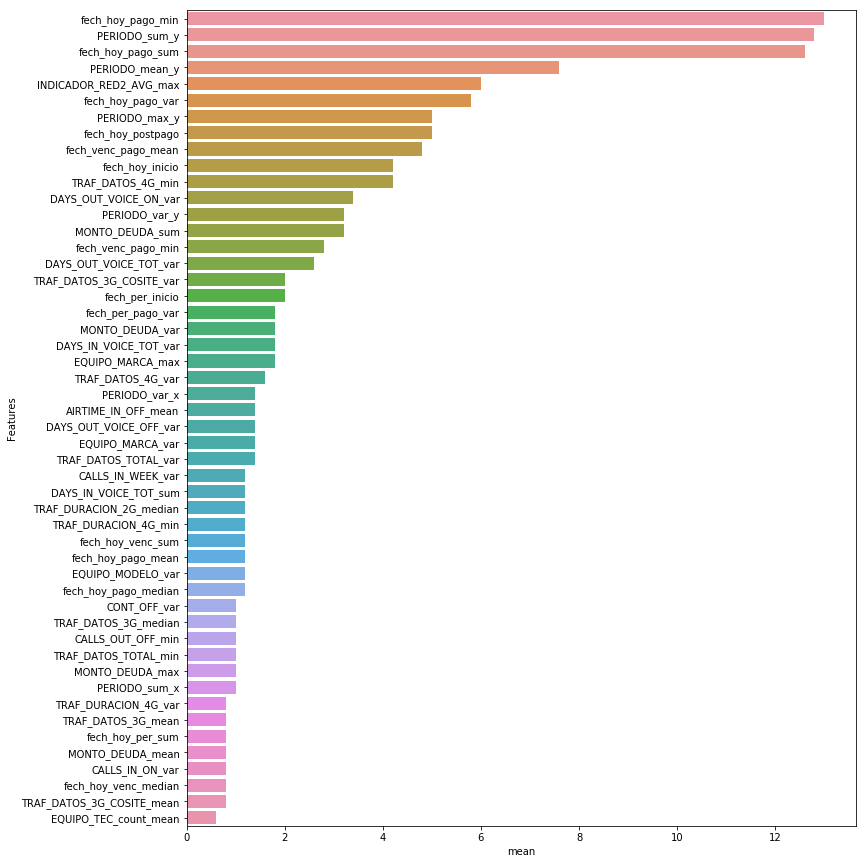

In [124]:
importances['mean']=importances.mean(axis=1)
importances_plot=importances.sort_values(by='mean',ascending=False)[0:50]
plt.figure(figsize=(12,15))
sns.barplot(x=importances_plot['mean'],y=importances_plot['Features'],order=importances_plot.sort_values(by='mean',ascending=False)['Features'])

In [125]:
predictions_lgb['mean']=predictions_lgb.mean(axis=1)

In [126]:
predictions_lgb.head()

,1,2,3,4,5,mean
0,0.019980,0.023374,0.022453,0.022384,0.018867,0.021412
1,0.019476,0.020319,0.021416,0.021389,0.020783,0.020676
2,0.064720,0.052249,0.052964,0.077818,0.048951,0.059340
3,0.026169,0.023624,0.021111,0.028226,0.020553,0.023937
4,0.015308,0.019534,0.019162,0.008142,0.013948,0.015219


In [127]:
predictions_lgb.shape

(69285, 6)

In [128]:
TARGET_test.shape

(69285, 4)

In [129]:
prediccion=pd.read_csv('/kaggle/input/submission/Target_ejemplo_subir_kaggle.csv')

In [130]:
TARGET_test.head()

,PERIODO,ID2,ID1,TARGET_PERM
1,201904,KtORvC1owqwWd0yGGWmRYC4S2ZhTRsLb04VINE/T3mE=,WQjPGbMIMi+cDDsVU3hWhtBq6rU5APmMp17WJBh3C2E=,NaN
4,201904,5OCi6B7EADY5F03JbHa8vKo4dMYyUDjpz1v+Gi2n+Gg=,L5hkyjzrD38WN0xGufxTmtFomRquhauOqADbSNAfFGo=,NaN
6,201904,0960Sdb+i05ZJhaiVtIjE/qu17Lc+PnTt1CAQIZKAwQ=,WvKgP0/9qE4pAXpx3xS2TFohqqdIDrLExmfKJSUVV4w=,NaN
7,201904,Psab8iMl5AUJRfE5ynpbCfmdqU2eBmWQGTv6l7HYaA0=,nfyM7o4WvCSqe9qLqS+/RrBvGPNiej2cXdIdCbnsB7w=,NaN
8,201905,R8rPYiP1mfzVFNLk2hHdq/hPws8JkiSr9jd55GNImkY=,hJpvDxF5OBFA45eVC5cad9g0pjrbuWk1jCa5No4uxIw=,NaN


In [131]:
TARGET_test_agg.head()

,PERIODO,ID2,ID1,TARGET_PERM,PERIODO_mean_x,PERIODO_sum_x,PERIODO_var_x,PERIODO_max_x,PERIODO_min_x,PERIODO_median_x,...,EQUIPO_OS_sin imei_var,EQUIPO_OS_sin imei_max,EQUIPO_OS_sin imei_min,EQUIPO_OS_sin imei_median,EQUIPO_OS_sin tac_mean,EQUIPO_OS_sin tac_sum,EQUIPO_OS_sin tac_var,EQUIPO_OS_sin tac_max,EQUIPO_OS_sin tac_min,EQUIPO_OS_sin tac_median
0,201904,24520,37365,NaN,201903.0,605709.0,1.0,201904.0,201902.0,201903.0,...,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0
1,201904,8188,25105,NaN,201903.0,605709.0,1.0,201904.0,201902.0,201903.0,...,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0
2,201904,2439,37882,NaN,201903.0,605709.0,1.0,201904.0,201902.0,201903.0,...,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0
3,201904,29904,55874,NaN,201903.0,605709.0,1.0,201904.0,201902.0,201903.0,...,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0
4,201905,31301,49108,NaN,201904.0,605712.0,1.0,201905.0,201903.0,201904.0,...,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0


In [132]:
TARGET_test.head()

,PERIODO,ID2,ID1,TARGET_PERM
1,201904,KtORvC1owqwWd0yGGWmRYC4S2ZhTRsLb04VINE/T3mE=,WQjPGbMIMi+cDDsVU3hWhtBq6rU5APmMp17WJBh3C2E=,NaN
4,201904,5OCi6B7EADY5F03JbHa8vKo4dMYyUDjpz1v+Gi2n+Gg=,L5hkyjzrD38WN0xGufxTmtFomRquhauOqADbSNAfFGo=,NaN
6,201904,0960Sdb+i05ZJhaiVtIjE/qu17Lc+PnTt1CAQIZKAwQ=,WvKgP0/9qE4pAXpx3xS2TFohqqdIDrLExmfKJSUVV4w=,NaN
7,201904,Psab8iMl5AUJRfE5ynpbCfmdqU2eBmWQGTv6l7HYaA0=,nfyM7o4WvCSqe9qLqS+/RrBvGPNiej2cXdIdCbnsB7w=,NaN
8,201905,R8rPYiP1mfzVFNLk2hHdq/hPws8JkiSr9jd55GNImkY=,hJpvDxF5OBFA45eVC5cad9g0pjrbuWk1jCa5No4uxIw=,NaN


In [133]:
TARGET_test.shape

(69285, 4)

In [134]:
TARGET_test['TARGET_PERM']=predictions_lgb['mean'].to_list()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [135]:
prediccion.head()

,ID1,TARGET_PERM
0,1vvU3hqK6NVLLLLNR8BIkbnTobzkV292qJa5dN0lD3g=,NaN
1,WQjPGbMIMi+cDDsVU3hWhtBq6rU5APmMp17WJBh3C2E=,NaN
2,NIkYYxyb7dedRql5+rM19S8nYKjjACoSxkC61AHStGU=,NaN
3,mISv7Z5WZlochlJ7op1dCy9+nn0UpJo9pgiOOCGb4eE=,NaN
4,L5hkyjzrD38WN0xGufxTmtFomRquhauOqADbSNAfFGo=,NaN


In [136]:
prediccion.drop('TARGET_PERM',axis=1,inplace=True)

In [137]:
subimission=pd.merge(prediccion,TARGET_test[['ID1','TARGET_PERM']],how='left',on='ID1')

In [138]:
subimission

,ID1,TARGET_PERM
0,1vvU3hqK6NVLLLLNR8BIkbnTobzkV292qJa5dN0lD3g=,0.028386
1,WQjPGbMIMi+cDDsVU3hWhtBq6rU5APmMp17WJBh3C2E=,0.021412
2,NIkYYxyb7dedRql5+rM19S8nYKjjACoSxkC61AHStGU=,0.014546
3,mISv7Z5WZlochlJ7op1dCy9+nn0UpJo9pgiOOCGb4eE=,0.020042
4,L5hkyjzrD38WN0xGufxTmtFomRquhauOqADbSNAfFGo=,0.020676
...,...,...
69280,kspjJhMhJGNvhtWazngILvD3aWBrtwNjG3NS8YSAuDo=,0.014588
69281,sSa0VyYsFIhPv085/wqXdPO0u8BybTzosxQJNmU1Y7k=,0.017262
69282,VI1Mp1mx2Vv9+sEXDjfS2eOKOAvLPwD74L/VGLfcwCU=,0.059280
69283,qcVnENdolKWw+Ppga0fdoQsMizpeRJ6gwW9erkD4eck=,0.012165


In [139]:
subimission.to_csv('subimissiontaco0.864lgbfinlcv.csv',index=False)